## Which location is easiest to predict their power output based on their features and should be modeled for future wind turbine locations for their operational efficiency and resource optimization?

### Project based on random forest models by Brendan Howard

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_loc_1 = pd.read_csv("Location1.csv")
df_loc_2 = pd.read_csv("Location2.csv")
df_loc_3 = pd.read_csv("Location3.csv")
df_loc_4 = pd.read_csv("Location4.csv")

In [49]:
print("Dtypes of columns in dataset: ")
df_loc_1.dtypes

Dtypes of columns in dataset: 


Time                    object
temperature_2m         float64
relativehumidity_2m      int64
dewpoint_2m            float64
windspeed_10m          float64
windspeed_100m         float64
winddirection_10m        int64
winddirection_100m       int64
windgusts_10m          float64
Power                  float64
dtype: object

In [50]:
print(f"Number of rows and columns in dataset: {df_loc_1.shape}")
df_loc_1.shape

Number of rows and columns in dataset: (43800, 10)


(43800, 10)

In [51]:
print("Descriptive statistics for each column")
df_loc_1.describe()

Descriptive statistics for each column


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [52]:
print("Are there any null values in dataset?")
df_loc_1.isnull().sum()

Are there any null values in dataset?


Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [53]:
df_loc_1['Time'] = pd.to_datetime(df_loc_1['Time'])

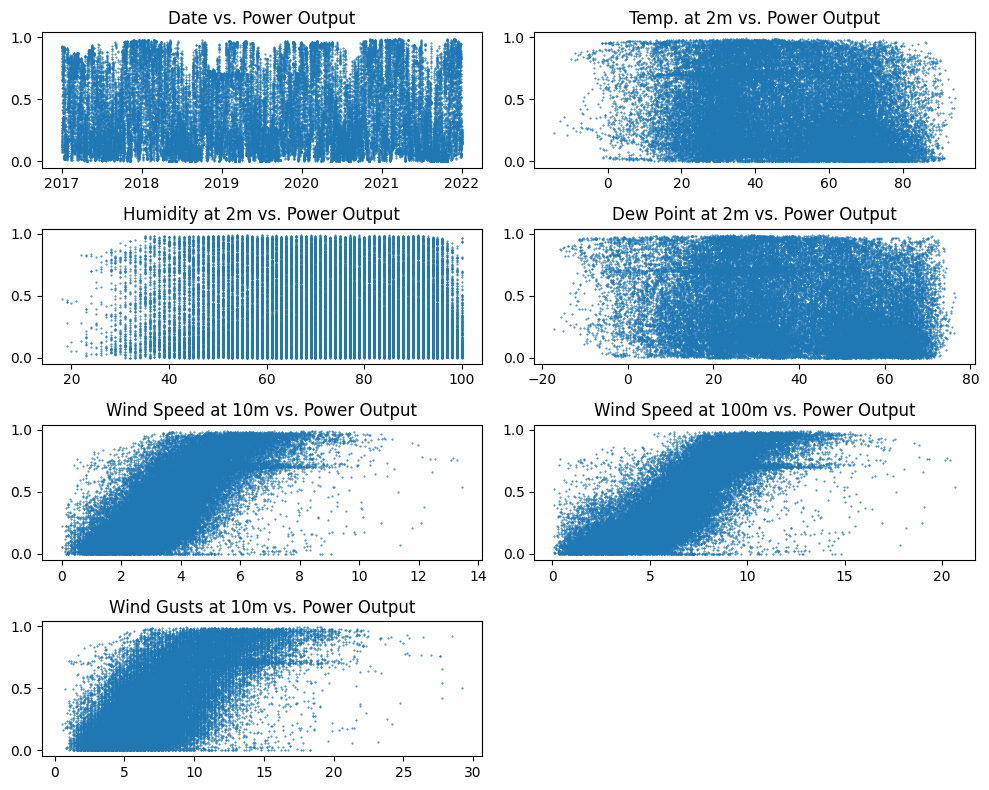

In [54]:
fig, axs = plt.subplots(4, 2, figsize = (10,8))

axs[0,0].scatter(df_loc_1['Time'], df_loc_1['Power'], s = 0.2)
axs[0,0].set_title('Date vs. Power Output')

axs[0,1].scatter(df_loc_1['temperature_2m'], df_loc_1['Power'], s = 0.2)
axs[0,1].set_title('Temp. at 2m vs. Power Output')

axs[1,0].scatter(df_loc_1['relativehumidity_2m'], df_loc_1['Power'], s = 0.2)
axs[1,0].set_title('Humidity at 2m vs. Power Output')

axs[1,1].scatter(df_loc_1['dewpoint_2m'], df_loc_1['Power'], s = 0.2)
axs[1,1].set_title('Dew Point at 2m vs. Power Output')

axs[2,0].scatter(df_loc_1['windspeed_10m'], df_loc_1['Power'], s = 0.2)
axs[2,0].set_title('Wind Speed at 10m vs. Power Output')

axs[2,1].scatter(df_loc_1['windspeed_100m'], df_loc_1['Power'], s = 0.2)
axs[2,1].set_title('Wind Speed at 100m vs. Power Output')

axs[3,0].scatter(df_loc_1['windgusts_10m'], df_loc_1['Power'], s = 0.2)
axs[3,0].set_title('Wind Gusts at 10m vs. Power Output')

fig.delaxes(axs[3, 1])

fig.tight_layout()

<Axes: >

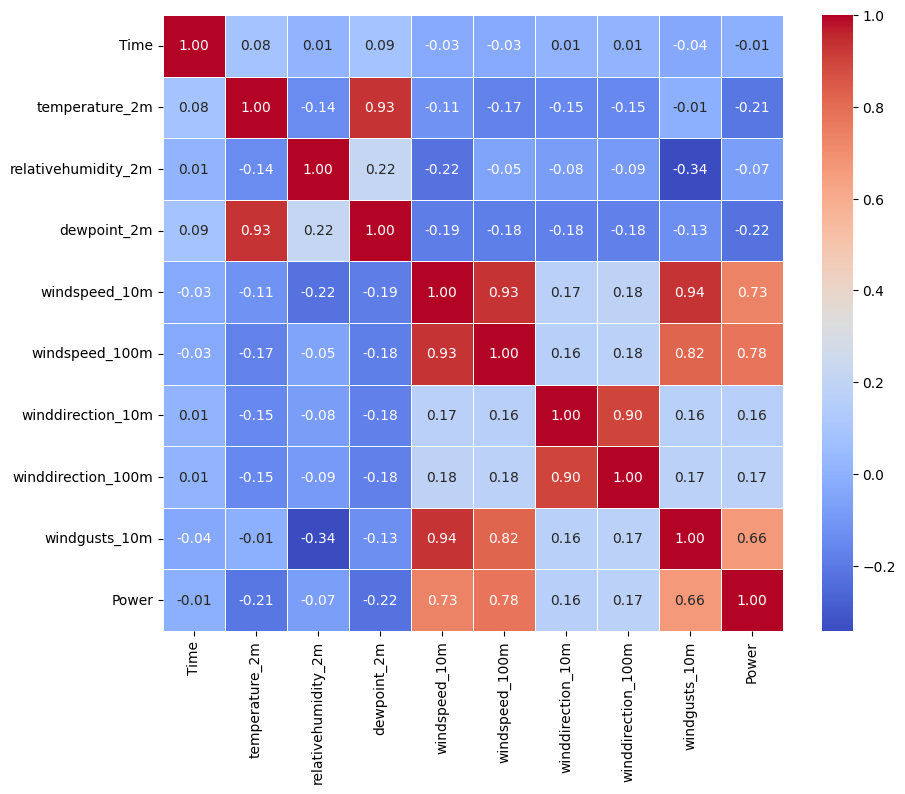

In [55]:
corr_matrix = df_loc_1.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)

<Axes: >

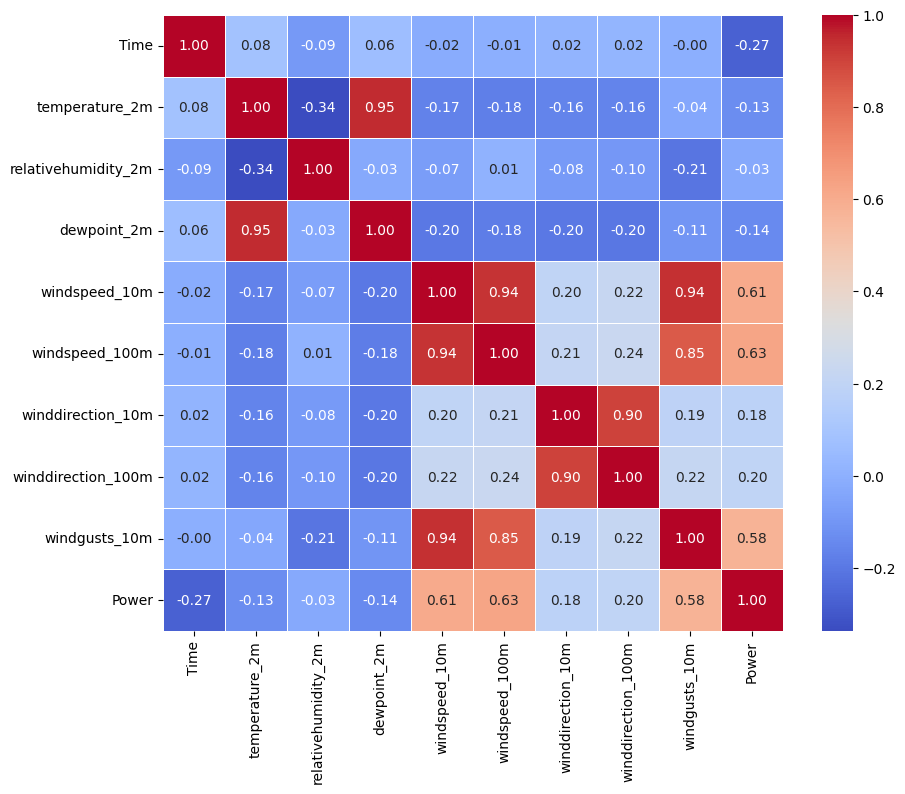

In [56]:
df_loc_2['Time'] = pd.to_datetime(df_loc_2['Time'])

corr_matrix_2 = df_loc_2.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix_2, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)

<Axes: >

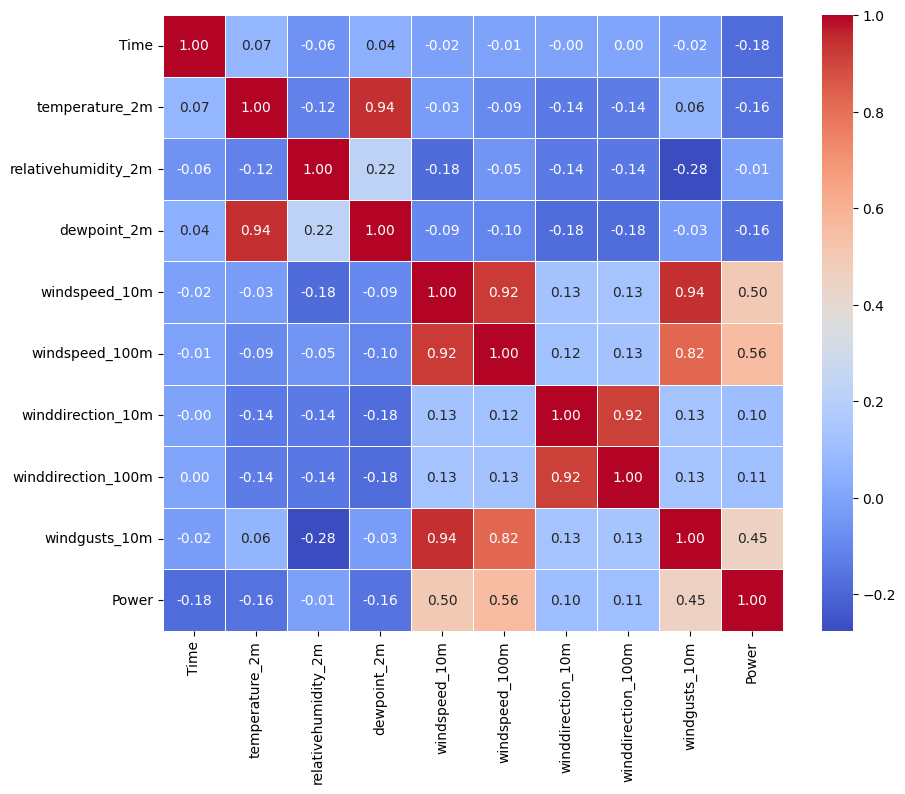

In [57]:
df_loc_3['Time'] = pd.to_datetime(df_loc_3['Time'])

corr_matrix_3 = df_loc_3.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix_3, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)

<Axes: >

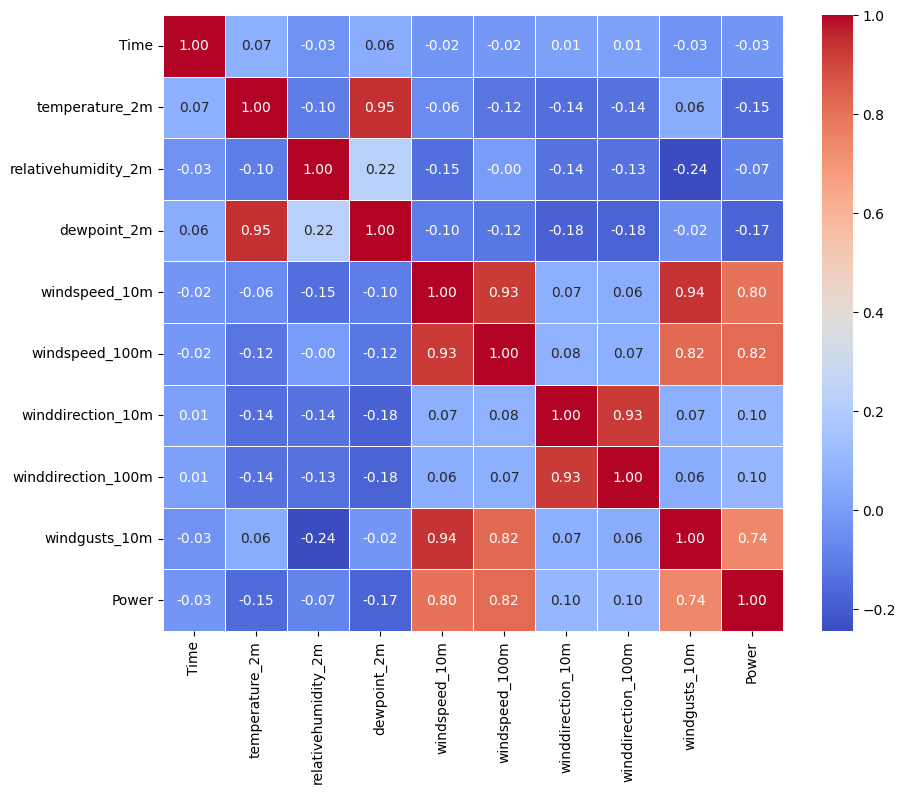

In [58]:
df_loc_4['Time'] = pd.to_datetime(df_loc_4['Time'])

corr_matrix_4 = df_loc_4.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix_4, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 0.02277035670310749
R-squared: 0.7236611539934805
Mean Absolute Error: 0.11


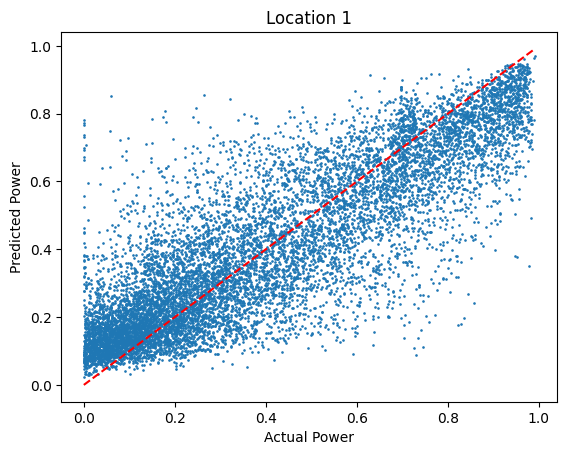

In [60]:
model = RandomForestRegressor()

features = ['windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'temperature_2m',
           'relativehumidity_2m', 'dewpoint_2m', 'winddirection_10m', 'winddirection_100m']
target = 'Power'

x = df_loc_1[features]
y = df_loc_1[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

baseline_errors = abs(y_test - y_pred)
print('Mean Absolute Error:', round(np.mean(baseline_errors), 2))

plt.scatter(y_test, y_pred, s = 0.8)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Location 1')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='y = x')
plt.show()

In [61]:
# Extract the RandomForestRegressor from the pipeline
random_forest = best_model.named_steps['randomforestregressor']

# Get numerical feature importances
importances = random_forest.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
print('Location 1')
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Location 1
Variable: windspeed_100m       Importance: 0.7
Variable: temperature_2m       Importance: 0.05
Variable: dewpoint_2m          Importance: 0.05
Variable: windspeed_10m        Importance: 0.04
Variable: windgusts_10m        Importance: 0.04
Variable: relativehumidity_2m  Importance: 0.04
Variable: winddirection_10m    Importance: 0.04
Variable: winddirection_100m   Importance: 0.04


Best Model MSE: 0.022620118079653175
Best Model R-squared: 0.7254844353927266
Mean Absolute Error:  0.11


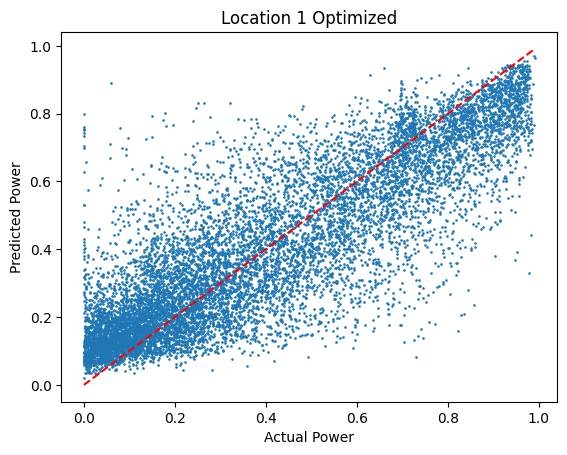

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Data Preprocessing
# Example: Standardize numerical features
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())

# Hyperparameter Tuning
# Example: Adjust hyperparameters using grid search
param_grid = {'randomforestregressor__n_estimators': [50, 100, 200],
              'randomforestregressor__max_depth': [None, 10, 20]}

# Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Best Model MSE: {mse}')
print(f'Best Model R-squared: {r2}')

errors = abs(y_test - y_pred2)
print('Mean Absolute Error: ', round(np.mean(errors), 2))

plt.scatter(y_test, y_pred2, s = 0.8)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Location 1 Optimized')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='y = x')
plt.show()

Mean Squared Error: 0.018677141997799268
R-squared: 0.5712979617991232
Mean Absolute Error: 0.1


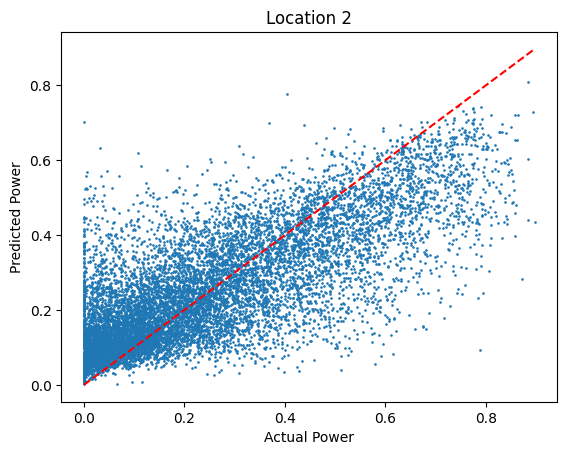

In [63]:
model = RandomForestRegressor()

features = ['windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'temperature_2m',
           'relativehumidity_2m', 'dewpoint_2m', 'winddirection_10m', 'winddirection_100m']
target = 'Power'

x = df_loc_2[features]
y = df_loc_2[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

baseline_errors = abs(y_test - y_pred)
print('Mean Absolute Error:', round(np.mean(baseline_errors), 2))

plt.scatter(y_test, y_pred, s = 0.8)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Location 2')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='y = x')
plt.show()

In [64]:
# Extract the RandomForestRegressor from the pipeline
random_forest = best_model.named_steps['randomforestregressor']

# Get numerical feature importances
importances = random_forest.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
print('Location 2')
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Location 2
Variable: windspeed_100m       Importance: 0.7
Variable: temperature_2m       Importance: 0.05
Variable: dewpoint_2m          Importance: 0.05
Variable: windspeed_10m        Importance: 0.04
Variable: windgusts_10m        Importance: 0.04
Variable: relativehumidity_2m  Importance: 0.04
Variable: winddirection_10m    Importance: 0.04
Variable: winddirection_100m   Importance: 0.04


Best Model MSE: 0.018615467633305044
Best Model R-squared: 0.5727135919724405
Mean Absolute Error:  0.1


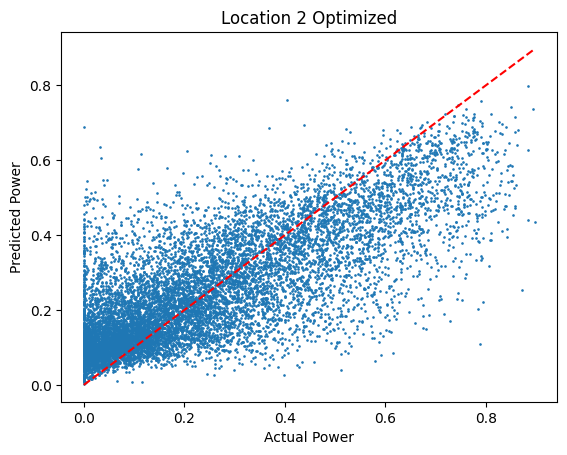

In [65]:
# Data Preprocessing
# Example: Standardize numerical features
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())

# Hyperparameter Tuning
# Example: Adjust hyperparameters using grid search
param_grid = {'randomforestregressor__n_estimators': [50, 100, 200],
              'randomforestregressor__max_depth': [None, 10, 20]}

# Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Best Model MSE: {mse}')
print(f'Best Model R-squared: {r2}')

errors = abs(y_test - y_pred2)
print('Mean Absolute Error: ', round(np.mean(errors), 2))

plt.scatter(y_test, y_pred2, s = 0.8)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Location 2 Optimized')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='y = x')
plt.show()

Mean Squared Error: 0.03273525384771826
R-squared: 0.5305271740797641
Mean Absolute Error: 0.13


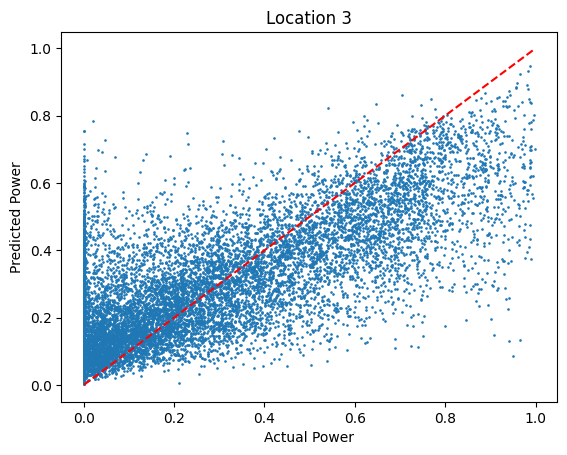

In [66]:
model = RandomForestRegressor()

features = ['windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'temperature_2m',
           'relativehumidity_2m', 'dewpoint_2m', 'winddirection_10m', 'winddirection_100m']
target = 'Power'

x = df_loc_3[features]
y = df_loc_3[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

baseline_errors = abs(y_test - y_pred)
print('Mean Absolute Error:', round(np.mean(baseline_errors), 2))

plt.scatter(y_test, y_pred, s = 0.8)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Location 3')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='y = x')
plt.show()

In [67]:
# Extract the RandomForestRegressor from the pipeline
random_forest = best_model.named_steps['randomforestregressor']

# Get numerical feature importances
importances = random_forest.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
print('Location 3')
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Location 3
Variable: windspeed_100m       Importance: 0.49
Variable: dewpoint_2m          Importance: 0.09
Variable: windgusts_10m        Importance: 0.08
Variable: temperature_2m       Importance: 0.08
Variable: windspeed_10m        Importance: 0.07
Variable: relativehumidity_2m  Importance: 0.07
Variable: winddirection_10m    Importance: 0.06
Variable: winddirection_100m   Importance: 0.06


Best Model MSE: 0.03242421037044934
Best Model R-squared: 0.5349880058465439
Mean Absolute Error:  0.13


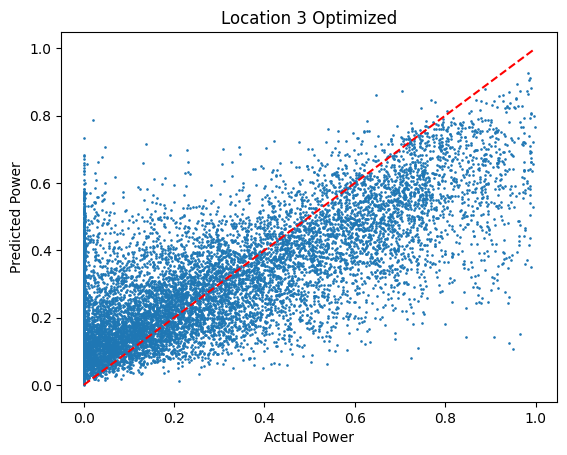

In [68]:
# Data Preprocessing
# Example: Standardize numerical features
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())

# Hyperparameter Tuning
# Example: Adjust hyperparameters using grid search
param_grid = {'randomforestregressor__n_estimators': [50, 100, 200],
              'randomforestregressor__max_depth': [None, 10, 20]}

# Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Best Model MSE: {mse}')
print(f'Best Model R-squared: {r2}')

errors = abs(y_test - y_pred2)
print('Mean Absolute Error: ', round(np.mean(errors), 2))

plt.scatter(y_test, y_pred2, s = 0.8)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Location 3 Optimized')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='y = x')
plt.show()

Mean Squared Error: 0.0119493290670695
R-squared: 0.7658118900395269
Mean Absolute Error: 0.08


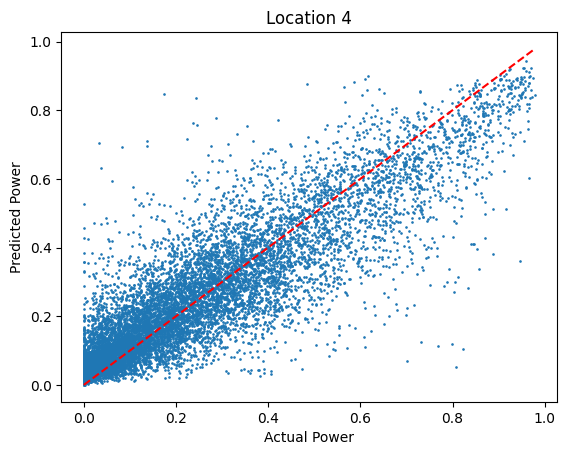

In [72]:
model = RandomForestRegressor()

features = ['windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'temperature_2m',
           'relativehumidity_2m', 'dewpoint_2m', 'winddirection_10m', 'winddirection_100m']
target = 'Power'

x = df_loc_4[features]
y = df_loc_4[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

baseline_errors = abs(y_test - y_pred)
print('Mean Absolute Error:', round(np.mean(baseline_errors), 2))

plt.scatter(y_test, y_pred, s = 0.8)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Location 4')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='y = x')
plt.show()

In [73]:
# Extract the RandomForestRegressor from the pipeline
random_forest = best_model.named_steps['randomforestregressor']

# Get numerical feature importances
importances = random_forest.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
print('Location 4')
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Location 4
Variable: windspeed_100m       Importance: 0.73
Variable: dewpoint_2m          Importance: 0.05
Variable: windspeed_10m        Importance: 0.04
Variable: windgusts_10m        Importance: 0.04
Variable: temperature_2m       Importance: 0.04
Variable: relativehumidity_2m  Importance: 0.03
Variable: winddirection_10m    Importance: 0.03
Variable: winddirection_100m   Importance: 0.03


Best Model MSE: 0.011885492485188331
Best Model R-squared: 0.7670629869315094
Mean Absolute Error:  0.08


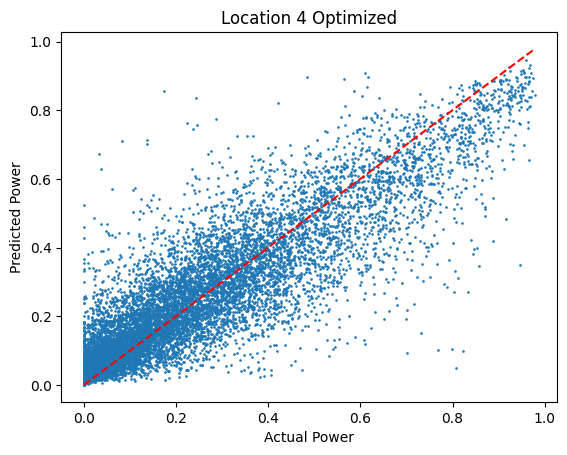

In [74]:
# Data Preprocessing
# Example: Standardize numerical features
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())

# Hyperparameter Tuning
# Example: Adjust hyperparameters using grid search
param_grid = {'randomforestregressor__n_estimators': [50, 100, 200],
              'randomforestregressor__max_depth': [None, 10, 20]}

# Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Best Model MSE: {mse}')
print(f'Best Model R-squared: {r2}')

errors = abs(y_test - y_pred2)
print('Mean Absolute Error: ', round(np.mean(errors), 2))

plt.scatter(y_test, y_pred2, s = 0.8)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Location 4 Optimized')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='y = x')
plt.show()

### After reviewing each of the locations' power output predictability in comparison to their actual power output based on their recorded features, location 4 seems to be the best location to model for future wind turbine builds. If a distinct location shares similar features as location 4, there would be reasonable expectations that it could provide similar results. 

### Additionally, operational procedures from location 4 can be adapted for the new location, which could potentially reduce costs for the company. It would be best to utilize wind speed data at 100 meters to best predict how the new location will perform.